# PDE: Campo Elettrico ed Equazione del calore in dominio 2D


### 1. Calcolo Campo Elettrico in un dominio 2D

Per il calcolo del campo elettrico in un dominio 2D generato da una linea di carica posta vicina a un bordo, utilizzeremo prima la equazione di Laplace-Poisson :$\rho(x,y)=\tfrac{d^2u}{dx^2}+\tfrac{d^2u}{dy^2}$ che risolveremo con il metodo SOR. Poi faremo un altro ciclo che useremo per risolvere l'equazione che lega il campo elettrico con il potenziale  $E(x,y)=-gradU$. La prima prova verrà fatta con una griglia larga 100.

N= 100
0.0001
niter to convergence: 150


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:84: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:85: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:86: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:87: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


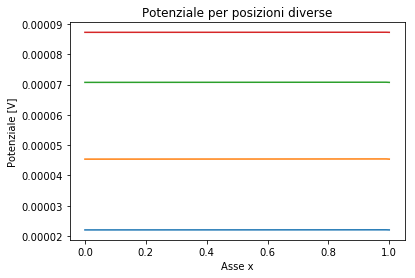

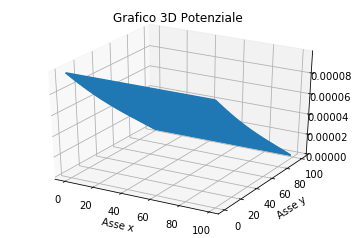

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:98: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


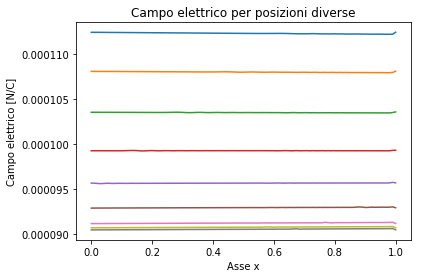

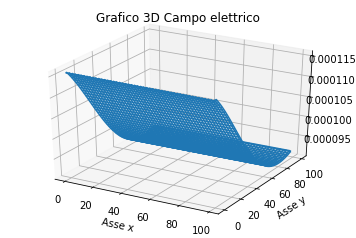

In [7]:
from numpy import *
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
                    
def sup3d(U):                                  
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(N),range(N))      #Range temporale su N, non esclude nulla. Disegna N punti
    ax.plot_wireframe(gridx ,gridy,U,cmap=cm.coolwarm,cstride=2,rstride=2)    #
    title('Grafico 3D Potenziale')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()

def stupid():            ### Grafico in 3D per campo elettrico                               
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(N),range(N))      #Range temporale su N, non esclude nulla. Disegna N punti
    ax.plot_wireframe(gridx,gridy,E,cmap=cm.coolwarm,cstride=2,rstride=2)    
    title('Grafico 3D Campo elettrico')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()

def setup():                              
    global N, omega, h, soglia, maxiter, L      ##Definizione Metodo SOR
    N=100;L=1.
    print ('N=',N)       #setup                        ##Numero punti e lunghezza interballi
    h=L/N                                       ##Largezza Intervallini 1/100
    maxiter=150                                 ##Maxiter Cover
    soglia=1.e-4                                ##Soglia di scelta nel ciclo
    omega=2.0/(1.0+sqrt(1-cos(pi*h)**2))         ##Termine di ottimizzazione SOR
    
def condiniz():
    global U, rho , Ex, Ey, E                       ### Definizione Condizioni Iniziali
    U=zeros((N,N))
    Ex=zeros((N,N))
    Ey=zeros((N,N))
    E=zeros((N,N))
    rho=zeros((N,N))
    U[:][0]=0.             ## Condizione al bordo per potenziale
    rho[:][0]=1.           ##Valore linea carica
    
    
def integra():
                      ## Ciclo Sor con condizioni di convergenza per calcolo del potenziale
    fine = False
    miniter=30
    niter=0
    meanU0=mean(U)
    Nint = (N-2)**2
    print (soglia)
    for k in range(maxiter):
        conv=0
        for i in range(0,N-1):
            for j in range(-1,N-1):
                Utmp = U[i][j]
                U[i][j] = 0.25*omega*(U[i][j+1]+U[i][j-1]+\
                                 U[i-1][j]+U[i+1][j]\
                                 +h*h*rho[i][j])\
                                 +(1.-omega)*U[i][j]
                conv += 0.5*abs((Utmp-U[i][j])/(Utmp+U[i][j]))
        niter += 1
        conv = conv/Nint
        fine = conv < soglia 
        fine = fine and niter > miniter
        if fine: break
    print ('niter to convergence:',niter)
                
def campo():                          ## Ciclo per il calcolo del campo elettrico
    x=linspace(0,L,N)
    for i in range(1,N-1):
        for j in range (-1,N-1):
            Ex[i][j]=-(U[i+1][j]-U[i-1][j])/(2*(x[i]-x[i-1]))
            Ey[i][j]=-(U[i][j+1]-U[i][j-1])/(2*(x[j]-x[j-1]))
            E[i][j]=(((Ex[i][j])**2)+((Ey[i][j])**2))**(0.5)
    E[:][0]=E[:][1]                  ### Condizioni di Dirichlet
    E[:][N-1]=E[:][N-2]
    

setup()
condiniz()
integra()
x=linspace(0,L,N)
figure(1)
title ('Potenziale per posizioni diverse')
xlabel ('Asse x')
ylabel ('Potenziale [V]')
plot(x,U[:][3*N/4])
plot(x,U[:][N/2])
plot(x,U[:][N/4])
plot(x,U[:][N/10])
show()
figure(2)
sup3d(U)

campo()
figure(3)
title ('Campo elettrico per posizioni diverse')
xlabel ('Asse x')
ylabel ('Campo elettrico [N/C]')
for i in range (1,10):
    plot(x,E[:][N*i/10])
show()
stupid()

Come ci aspettavamo, il campo elettrico e il potenziale, per posizioni della griglia che si allontanano dalla linea di carica diminuisco e nel punto scelto rimangono costanti. Ora proveremo a fare la stessa cosa ma con valori di griglia che crescenti.

N= 200
0.0001
niter to convergence: 150


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:84: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:85: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:86: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:87: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


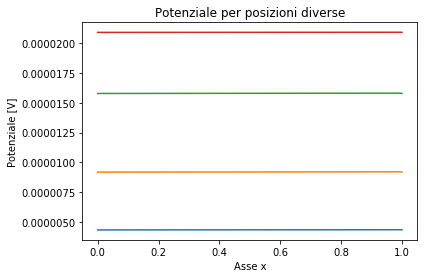

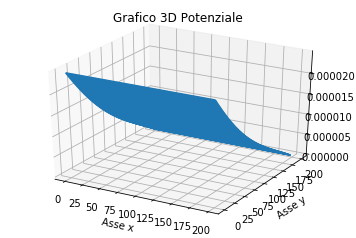

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:98: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


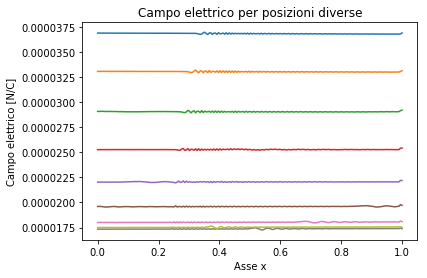

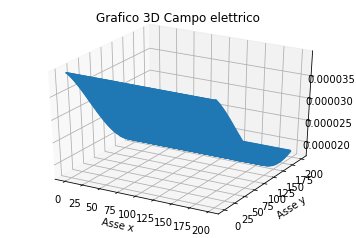

In [ ]:
from numpy import *
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
                    ##Grafico in 3D per potenziale
def sup3d(U):                                  
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(N),range(N))      #Range temporale su N, non esclude nulla. Disegna N punti
    ax.plot_wireframe(gridx ,gridy,U,cmap=cm.coolwarm,cstride=2,rstride=2)    #
    title('Grafico 3D Potenziale')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()

def stupid():            ### Grafico in 3D per campo elettrico                               
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(N),range(N))      #Range temporale su N, non esclude nulla. Disegna N punti
    ax.plot_wireframe(gridx,gridy,E,cmap=cm.coolwarm,cstride=2,rstride=2)    
    title('Grafico 3D Campo elettrico')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()

def setup():                              
    global N, omega, h, soglia, maxiter, L      ##Definizione Metodo SOR
    N=200;L=1.    #setup                        ##Numero punti e lunghezza interballi
    h=L/N  
    print ('N=',N)##Largezza Intervallini 1/200
    maxiter=150                                 ##Maxiter Cover
    soglia=1.e-4                                ##Soglia di scelta nel ciclo
    omega=2.0/(1.0+sqrt(1-cos(pi*h)**2))         ##Termine di ottimizzazione SOR
    
def condiniz():
    global U, rho , Ex, Ey, E                       ### Definizione Condizioni Iniziali
    U=zeros((N,N))
    Ex=zeros((N,N))
    Ey=zeros((N,N))
    E=zeros((N,N))
    rho=zeros((N,N))
    U[:][0]=0.             ## Condizione al bordo per potenziale
    rho[:][0]=1.           ##Valore linea carica
    
    
def integra():
                      ## Ciclo Sor con condizioni di convergenza per calcolo del potenziale
    fine = False
    miniter=30
    niter=0
    meanU0=mean(U)
    Nint = (N-2)**2
    print (soglia)
    for k in range(maxiter):
        conv=0
        for i in range(0,N-1):
            for j in range(-1,N-1):
                Utmp = U[i][j]
                U[i][j] = 0.25*omega*(U[i][j+1]+U[i][j-1]+\
                                 U[i-1][j]+U[i+1][j]\
                                 +h*h*rho[i][j])\
                                 +(1.-omega)*U[i][j]
                conv += 0.5*abs((Utmp-U[i][j])/(Utmp+U[i][j]))
        niter += 1
        conv = conv/Nint
        fine = conv < soglia 
        fine = fine and niter > miniter
        if fine: break
    print ('niter to convergence:',niter)
                
def campo():                          ## Ciclo per il calcolo del campo elettrico
    x=linspace(0,L,N)
    for i in range(1,N-1):
        for j in range (-1,N-1):
            Ex[i][j]=-(U[i+1][j]-U[i-1][j])/(2*(x[i]-x[i-1]))
            Ey[i][j]=-(U[i][j+1]-U[i][j-1])/(2*(x[j]-x[j-1]))
            E[i][j]=(((Ex[i][j])**2)+((Ey[i][j])**2))**(0.5)
    E[:][0]=E[:][1]                  ### Condizioni di Dirichlet
    E[:][N-1]=E[:][N-2]
    

setup()
condiniz()
integra()
x=linspace(0,L,N)
figure(1)
title ('Potenziale per posizioni diverse')
xlabel ('Asse x')
ylabel ('Potenziale [V]')
plot(x,U[:][3*N/4])
plot(x,U[:][N/2])
plot(x,U[:][N/4])
plot(x,U[:][N/10])
show()
figure(2)
sup3d(U)

campo()
figure(3)
title ('Campo elettrico per posizioni diverse')
xlabel ('Asse x')
ylabel ('Campo elettrico [N/C]')
for i in range (1,10):
    plot(x,E[:][N*i/10])
show()
stupid()

Come possiamo notare, aumentando il valore della griglia i valori del le linee di campo elettrico presentano delle oscillazioni intorno al valore medio. Questo significa che aumentando la griglia il campo elettrico non converge più precisamente come lo faceva prima. 

0.0001
niter to convergence: 150


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:84: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:85: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:86: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


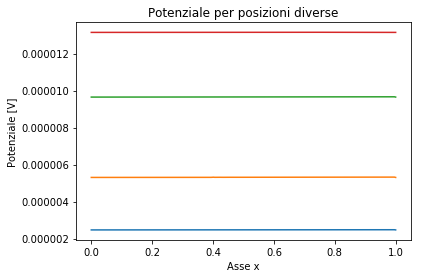

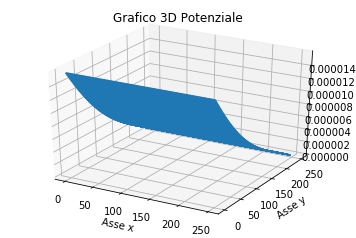

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


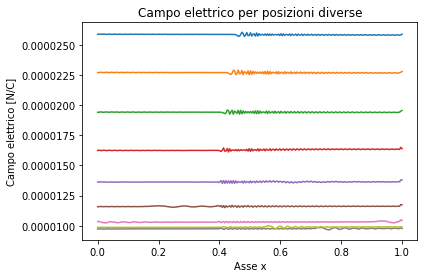

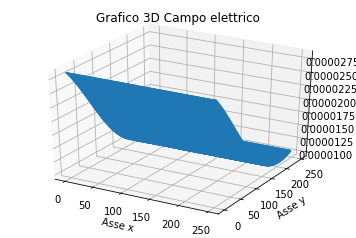

In [ ]:
from numpy import *
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
                    ##Grafico in 3D per potenziale
def sup3d(U):                                  
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(N),range(N))      #Range temporale su N, non esclude nulla. Disegna N punti
    ax.plot_wireframe(gridx ,gridy,U,cmap=cm.coolwarm,cstride=2,rstride=2)    #
    title('Grafico 3D Potenziale')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()

def stupid():            ### Grafico in 3D per campo elettrico                               
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(N),range(N))      #Range temporale su N, non esclude nulla. Disegna N punti
    ax.plot_wireframe(gridx,gridy,E,cmap=cm.coolwarm,cstride=2,rstride=2)    
    title('Grafico 3D Campo elettrico')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()

def setup():                              
    global N, omega, h, soglia, maxiter, L      ##Definizione Metodo SOR
    N=250;L=1.    #setup                        ##Numero punti e lunghezza interballi
    h=L/N                                       ##Largezza Intervallini 1/200
    maxiter=150                                 ##Maxiter Cover
    soglia=1.e-4                                ##Soglia di scelta nel ciclo
    omega=2.0/(1.0+sqrt(1-cos(pi*h)**2))         ##Termine di ottimizzazione SOR
    
def condiniz():
    global U, rho , Ex, Ey, E                       ### Definizione Condizioni Iniziali
    U=zeros((N,N))
    Ex=zeros((N,N))
    Ey=zeros((N,N))
    E=zeros((N,N))
    rho=zeros((N,N))
    U[:][0]=0.             ## Condizione al bordo per potenziale
    rho[:][0]=1.           ##Valore linea carica
    
    
def integra():
                      ## Ciclo Sor con condizioni di convergenza per calcolo del potenziale
    fine = False
    miniter=30
    niter=0
    meanU0=mean(U)
    Nint = (N-2)**2
    print (soglia)
    for k in range(maxiter):
        conv=0
        for i in range(0,N-1):
            for j in range(-1,N-1):
                Utmp = U[i][j]
                U[i][j] = 0.25*omega*(U[i][j+1]+U[i][j-1]+\
                                 U[i-1][j]+U[i+1][j]\
                                 +h*h*rho[i][j])\
                                 +(1.-omega)*U[i][j]
                conv += 0.5*abs((Utmp-U[i][j])/(Utmp+U[i][j]))
        niter += 1
        conv = conv/Nint
        fine = conv < soglia 
        fine = fine and niter > miniter
        if fine: break
    print ('niter to convergence:',niter)
                
def campo():                          ## Ciclo per il calcolo del campo elettrico
    x=linspace(0,L,N)
    for i in range(1,N-1):
        for j in range (-1,N-1):
            Ex[i][j]=-(U[i+1][j]-U[i-1][j])/(2*(x[i]-x[i-1]))
            Ey[i][j]=-(U[i][j+1]-U[i][j-1])/(2*(x[j]-x[j-1]))
            E[i][j]=(((Ex[i][j])**2)+((Ey[i][j])**2))**(0.5)
    E[:][0]=E[:][1]                  ### Condizioni di Dirichlet
    E[:][N-1]=E[:][N-2]
    

setup()
condiniz()
integra()
x=linspace(0,L,N)
figure(1)
title ('Potenziale per posizioni diverse')
xlabel ('Asse x')
ylabel ('Potenziale [V]')
plot(x,U[:][3*N/4])
plot(x,U[:][N/2])
plot(x,U[:][N/4])
plot(x,U[:][N/10])
show()
figure(2)
sup3d(U)

campo()
figure(3)
title ('Campo elettrico per posizioni diverse')
xlabel ('Asse x')
ylabel ('Campo elettrico [N/C]')
for i in range (1,10):
    plot(x,E[:][N*i/10])
show()
stupid()

Come possiamo notare aumentando ancora la grandezza della griglia il campo elettrico perde sempre di piu in precisione, inoltre il tempo per caricare il programma diventa circa di 2 minuti. Ora proveremo a calcolare il campo elettrico ma facendo variare i valori di soglia e vedendo cosa comporta questa variazione.

0.0001
niter to convergence: 150


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:84: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:85: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:86: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


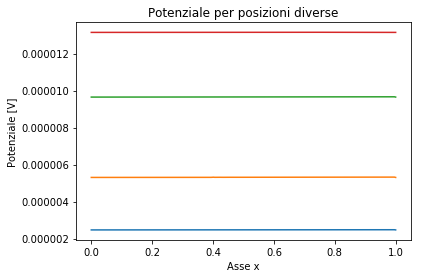

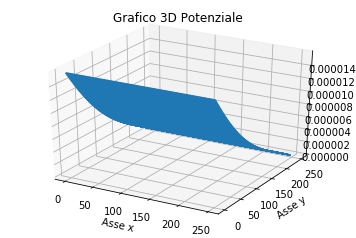

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


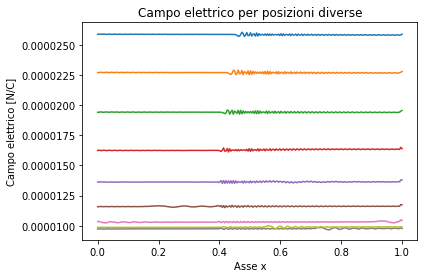

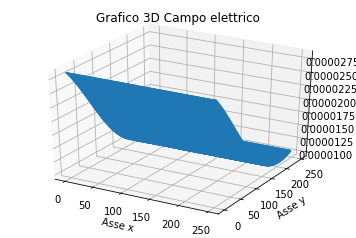

0.01
niter to convergence: 31
-2.34869602063e-06


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:112: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:114: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:115: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


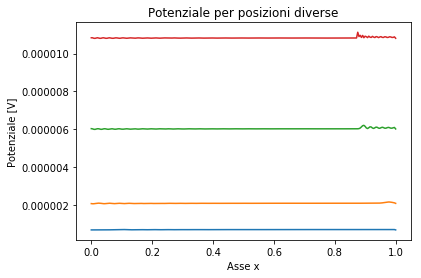

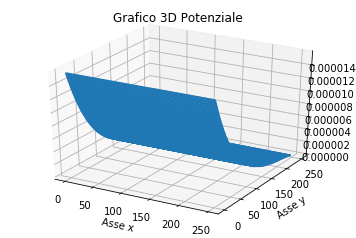

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:126: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


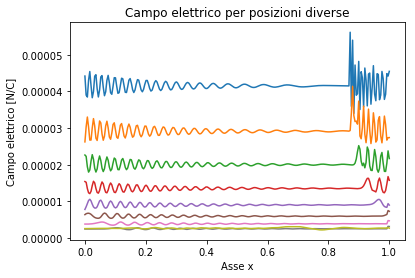

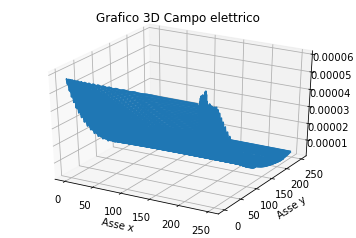

1.0
niter to convergence: 31
0.0


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:141: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:142: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:144: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


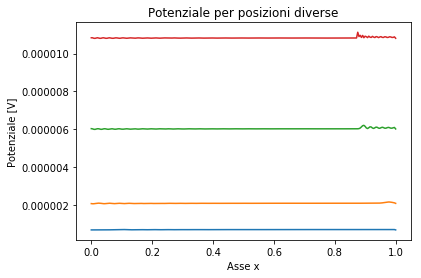

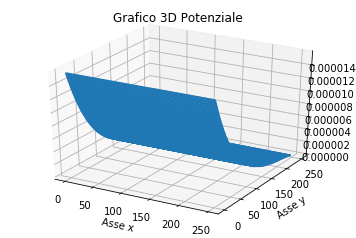

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:155: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


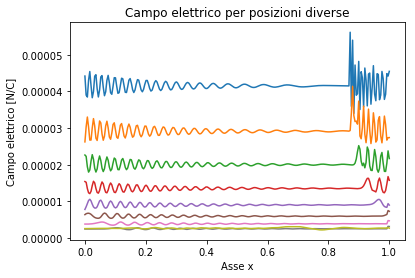

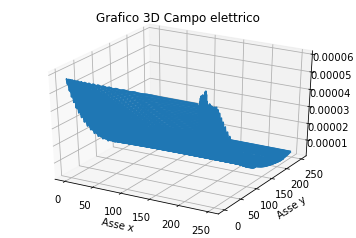

10000
niter to convergence: 31
0.0


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:170: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:171: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:172: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:173: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


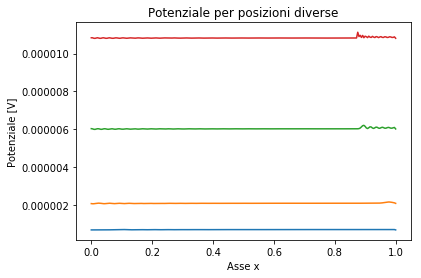

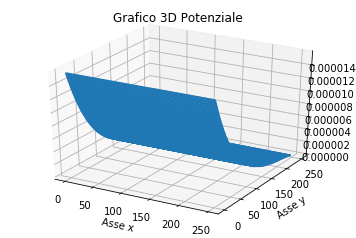

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:184: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


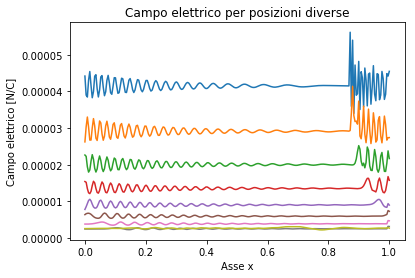

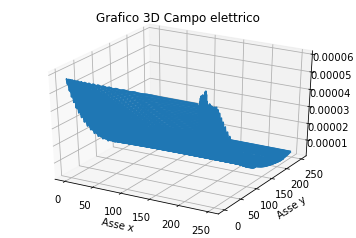

In [1]:
from numpy import *
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
                    ##Grafico in 3D per potenziale
def sup3d(U):                                  
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(N),range(N))      #Range temporale su N, non esclude nulla. Disegna N punti
    ax.plot_wireframe(gridx ,gridy,U,cmap=cm.coolwarm,cstride=2,rstride=2)    #
    title('Grafico 3D Potenziale')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()

def stupid():            ### Grafico in 3D per campo elettrico                               
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(N),range(N))      #Range temporale su N, non esclude nulla. Disegna N punti
    ax.plot_wireframe(gridx,gridy,E,cmap=cm.coolwarm,cstride=2,rstride=2)    
    title('Grafico 3D Campo elettrico')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()

def setup():                              
    global N, omega, h, soglia, maxiter, L      ##Definizione Metodo SOR
    N=250;L=1.    #setup                        ##Numero punti e lunghezza interballi
    h=L/N                                       ##Largezza Intervallini 1/200
    maxiter=150                                 ##Maxiter Cover
    soglia=1.e-4                                ##Soglia di scelta nel ciclo
    omega=2.0/(1.0+sqrt(1-cos(pi*h)**2))         ##Termine di ottimizzazione SOR
    
def condiniz():
    global U, rho , Ex, Ey, E                       ### Definizione Condizioni Iniziali
    U=zeros((N,N))
    Ex=zeros((N,N))
    Ey=zeros((N,N))
    E=zeros((N,N))
    rho=zeros((N,N))
    U[:][0]=0.             ## Condizione al bordo per potenziale
    rho[:][0]=1.           ##Valore linea carica
    
    
def integra():
                      ## Ciclo Sor con condizioni di convergenza per calcolo del potenziale
    fine = False
    miniter=30
    niter=0
    meanU0=mean(U)
    Nint = (N-2)**2
    print (soglia)
    for k in range(maxiter):
        conv=0
        for i in range(0,N-1):
            for j in range(-1,N-1):
                Utmp = U[i][j]
                U[i][j] = 0.25*omega*(U[i][j+1]+U[i][j-1]+\
                                 U[i-1][j]+U[i+1][j]\
                                 +h*h*rho[i][j])\
                                 +(1.-omega)*U[i][j]
                conv += 0.5*abs((Utmp-U[i][j])/(Utmp+U[i][j]))
        niter += 1
        conv = conv/Nint
        fine = conv < soglia 
        fine = fine and niter > miniter
        if fine: break
    print ('niter to convergence:',niter)
                
def campo():                          ## Ciclo per il calcolo del campo elettrico
    x=linspace(0,L,N)
    for i in range(1,N-1):
        for j in range (-1,N-1):
            Ex[i][j]=-(U[i+1][j]-U[i-1][j])/(2*(x[i]-x[i-1]))
            Ey[i][j]=-(U[i][j+1]-U[i][j-1])/(2*(x[j]-x[j-1]))
            E[i][j]=(((Ex[i][j])**2)+((Ey[i][j])**2))**(0.5)
    E[:][0]=E[:][1]                  ### Condizioni di Dirichlet
    E[:][N-1]=E[:][N-2]
    
### 1^ soglia
setup()
condiniz()
integra()
x=linspace(0,L,N)
figure(1)
title ('Potenziale per posizioni diverse')
xlabel ('Asse x')
ylabel ('Potenziale [V]')
plot(x,U[:][3*N/4])
plot(x,U[:][N/2])
plot(x,U[:][N/4])
plot(x,U[:][N/10])
show()
figure(2)
sup3d(U)

campo()
figure(2)
title ('Campo elettrico per posizioni diverse')
xlabel ('Asse x')
ylabel ('Campo elettrico [N/C]')
for i in range (1,10):
    plot(x,E[:][N*i/10])
show()
stupid()

         ## 2^ soglia
Usave=U
soglia=1.e-2
condiniz()
integra()
print (mean(U)-mean(Usave))
x=linspace(0,L,N)
figure(3)
title ('Potenziale per posizioni diverse')
xlabel ('Asse x')
ylabel ('Potenziale [V]')
plot(x,U[:][3*N/4])
plot(x,U[:][N/2])
plot(x,U[:][N/4])
plot(x,U[:][N/10])
show()
figure(3)
sup3d(U)

campo()
figure(4)
title ('Campo elettrico per posizioni diverse')
xlabel ('Asse x')
ylabel ('Campo elettrico [N/C]')
for i in range (1,10):
    plot(x,E[:][N*i/10])
show()
stupid()

         ## 3^ soglia
Usave=U
soglia=1.
condiniz()
integra()
print (mean(U)-mean(Usave))
x=linspace(0,L,N)
figure(3)
title ('Potenziale per posizioni diverse')
xlabel ('Asse x')
ylabel ('Potenziale [V]')
plot(x,U[:][3*N/4])
plot(x,U[:][N/2])
plot(x,U[:][N/4])
plot(x,U[:][N/10])
show()
figure(3)
sup3d(U)

campo()
figure(4)
title ('Campo elettrico per posizioni diverse')
xlabel ('Asse x')
ylabel ('Campo elettrico [N/C]')
for i in range (1,10):
    plot(x,E[:][N*i/10])
show()
stupid()

         ## 4^ soglia
Usave=U
soglia=1*10**4
condiniz()
integra()
print (mean(U)-mean(Usave))
x=linspace(0,L,N)
figure(3)
title ('Potenziale per posizioni diverse')
xlabel ('Asse x')
ylabel ('Potenziale [V]')
plot(x,U[:][3*N/4])
plot(x,U[:][N/2])
plot(x,U[:][N/4])
plot(x,U[:][N/10])
show()
figure(3)
sup3d(U)

campo()
figure(4)
title ('Campo elettrico per posizioni diverse')
xlabel ('Asse x')
ylabel ('Campo elettrico [N/C]')
for i in range (1,10):
    plot(x,E[:][N*i/10])
show()
stupid()


Come possiamo notare facendo variare il valore della soglia di convergenza il campo elettrico oscilla in un modo incredibile, facendoci capire come la convergenza dei valori nel metodo SOR è la cosa più importante.

### 2. Equazione del calore

Per verificare le prestazioni e la stabilità dei parametri di integrazione dei metodi FTCS e Cranck-Nicolsono risolveremo l'equazione del calore. Imponendo delle opportune condizioni ai bordi vedremo come i due metodi calcolano l'evoluzione del sistema. 

raggio spettrale C= 1.79954688814
raggio spettrale GS= 1.0


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:61: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:62: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:63: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


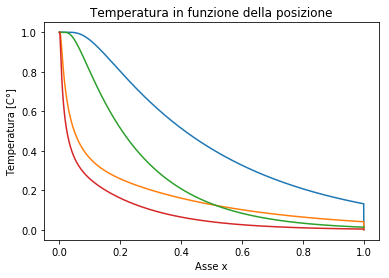

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:72: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:73: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:74: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:75: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


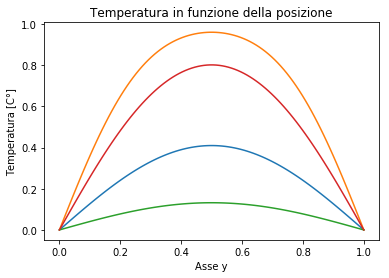

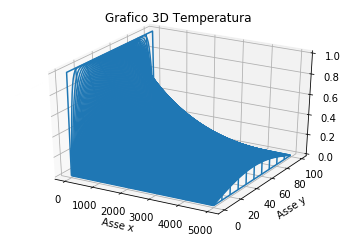

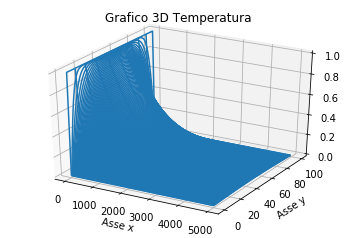

In [7]:
from numpy import *
from matplotlib.pyplot import *
from scipy import linalg 
from mpl_toolkits.mplot3d import Axes3D
                
N=100            ## Spazio       
Nt=5000          ##time step
ts=1
tau=0.9*ts        ##coeff 
coef=tau/ts
T=zeros((N,Nt))      ##Defin. funzione da calcolare FTCS
T1=zeros((N,Nt))        ## CRanck Nicolson
T[:,0]=1.            ##Valore temperatura linea di calore
T1[:,0]=1.


T[0,:]=0.    #Dirichlet
T[N-1,:]=0.
T1[0,:]=0.    #Dirichlet
T1[N-1,:]=0.
         ##Ftcs con ciclo
for time in range (1,Nt-1):
    for i in range (1,N-1):
        T[i,time]=T[i,time-1]+0.5*coef*(T[i-1,time-1]+T[i+1,time-1]-2*T[i,time-1])
        niter=+1
    ##Cranck formulazione matriciale
M=-2*eye(N)  
for i in range(1,N-1):
    M[i,i-1]=1
    M[i,i+1]=1

CN=zeros((N,N))       ##Matrice C
C=-tau/(2*ts)
CN=C*M
CN[0,:]=0            ##Condizioni di convergenza della matrice C a11 e ann = 0
CN[N-1,:]=0
FT=zeros((N,N))
FT=eye(N)+CN                      ##I+C

print ('raggio spettrale C=',max(abs(linalg.eig(CN)[0])))  ## Parametro di convergenza: Raggio spettrale


FS=zeros((N,N))              ##I-C
FS=eye(N)-CN            
FSi=zeros((N,N))
FSi=linalg.inv(FT)          ##(I+C)-1
GS=zeros((N,N))
GS=matmul(FSi,FS)         ##prodotto matriciale (I+C)^-1(I-C)
print ('raggio spettrale GS=',max(abs(linalg.eig(GS)[0])))


##cranck MATRIX
for time in range (0,Nt-1):
    T1[:,time+1]=matmul(GS,T1[:,time])

figure(2)
x=linspace(0,1,Nt)
title('Temperatura in funzione della posizione')
xlabel('Asse x')
ylabel ('Temperatura [C°]')
plot(x,T[N/2,:])    ##FTCS
plot(x,T[N/10,:])
plot(x,T1[N/2,:])   
plot(x,T1[N/10,:])
show()

figure(3)
y=linspace(0,1,N)
title('Temperatura in funzione della posizione')
xlabel('Asse y')
ylabel ('Temperatura [C°]')
plot(y,T[:,Nt/2])
plot(y,T[:,Nt/10])
plot(y,T1[:,Nt/2])
plot(y,T1[:,Nt/10])
show()


ax = gca(projection='3d')
gridx , gridy = meshgrid(range(Nt),range(N))
ax.plot_wireframe(gridx,gridy,T,cstride=18,rstride=10)
title('Grafico 3D Temperatura')
xlabel('Asse x')
ylabel ('Asse y')
show()
ax = gca(projection='3d')
gridx , gridy = meshgrid(range(Nt),range(N))
ax.plot_wireframe(gridx,gridy,T1,cstride=18,rstride=10)
title('Grafico 3D Temperatura')
xlabel('Asse x')
ylabel ('Asse y')
show()


Si può notare come Cranck Nicolson sia più veloce nel calcolo dell'andamento della temperatura. Difatti si può notare come la curva tipica scenda più velocemente e ai bordi non ha nessun problema. Si può notare che  è proprio 1 come ci dovremmo aspettare, nel calcolo della temperatura 'Cranck Nicolsono è sempre più efficace di FTCS. Ora faremo variare il coeff. tau.

a= 0.1
raggio spettrale C= 0.199949654238
raggio spettrale GS= 1.0
Nt= 5000


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:70: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:72: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:73: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


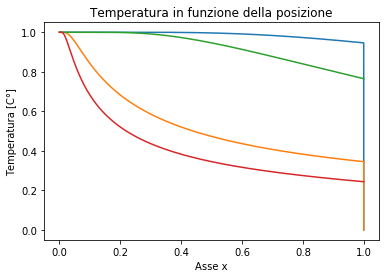

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:81: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:82: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:84: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


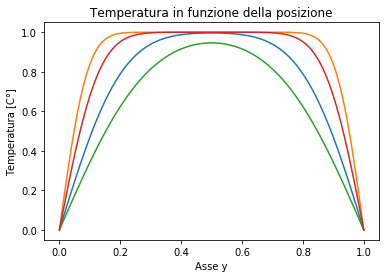

a= 0.3
raggio spettrale C= 0.599848962715
raggio spettrale GS= 1.0
Nt= 5000


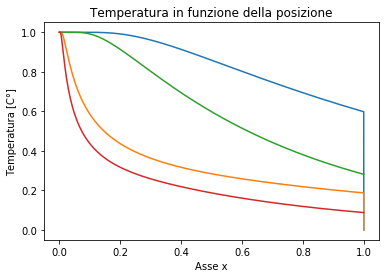

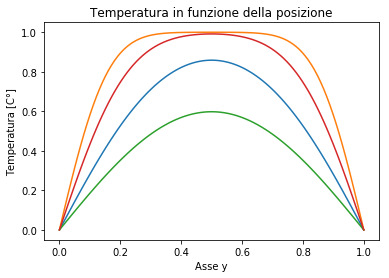

a= 0.5
raggio spettrale C= 0.999748271192
raggio spettrale GS= 1.0
Nt= 5000


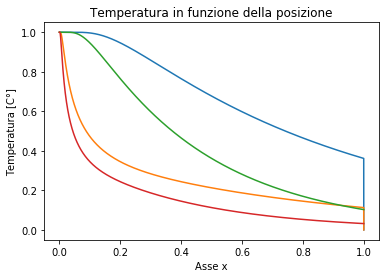

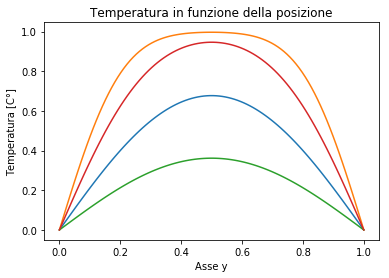

a= 0.7
raggio spettrale C= 1.39964757967
raggio spettrale GS= 1.0
Nt= 5000


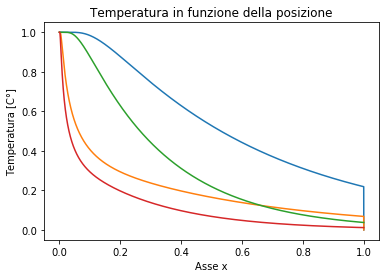

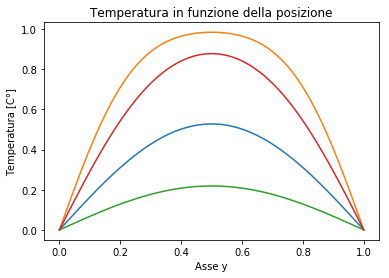

a= 0.9
raggio spettrale C= 1.79954688814
raggio spettrale GS= 1.0
Nt= 5000


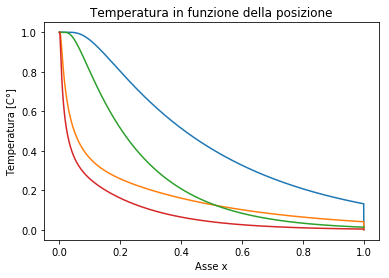

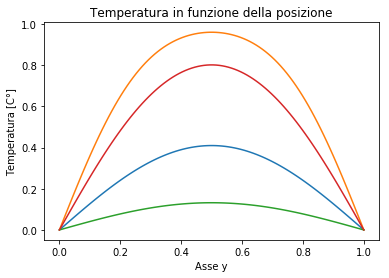

a= 1
raggio spettrale C= 1.99949654238
raggio spettrale GS= 1.0
Nt= 5000


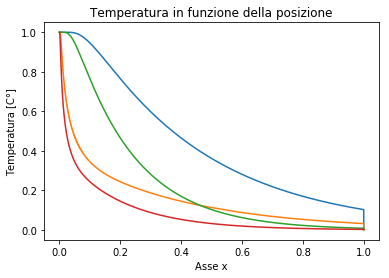

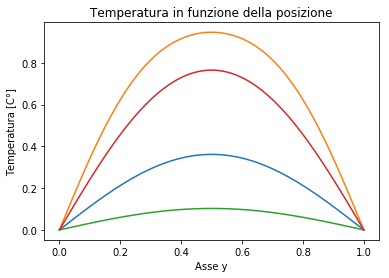

In [4]:
from numpy import *
from matplotlib.pyplot import *
from scipy import linalg 
   
r= [0.1 ,0.3 ,0.5 , 0.7, 0.9, 1]  
for a in r:    
    N=100
    Nt=5000
    ts=1
    tau=a*ts
    coef=tau/ts
    T=zeros((N,Nt))
    T1=zeros((N,Nt))
    T[:,0]=1.
    T1[:,0]=1.
    print ('a=',a)

    T[0,:]=0.    #Dirichlet
    T[N-1,:]=0.
    T1[0,:]=0.    #Dirichlet
    T1[N-1,:]=0.

    for time in range (1,Nt-1):
        for i in range (1,N-1):
            T[i,time]=T[i,time-1]+0.5*coef*(T[i-1,time-1]+T[i+1,time-1]-2*T[i,time-1])
            niter=+1
    
    M=-2*eye(N)
    M[0,:]=0
    M[N-1,:]=0
 

    for i in range(1,N-1):
        M[i,i-1]=1
        M[i,i+1]=1

    CN=zeros((N,N))
    C=-tau/(2*ts)
    CN=C*M
    CN[0,:]=0
    CN[N-1,:]=0
   
    FT=zeros((N,N))
    FT=eye(N)+CN                      ##I+C

   
    print ('raggio spettrale C=',max(abs(linalg.eig(CN)[0])))


    FS=zeros((N,N))              ##I-C
    FS=eye(N)-CN            

    FSi=zeros((N,N))
    FSi=linalg.inv(FT)          ##(I+C)-1
    
    GS=zeros((N,N))
    GS=matmul(FSi,FS)
    print ('raggio spettrale GS=',max(abs(linalg.eig(GS)[0])))


##cranck MATRIX
    for time in range (0,Nt-1):
        T1[:,time+1]=matmul(GS,T1[:,time])
    print ('Nt=',Nt)
    figure(2)
    x=linspace(0,1,Nt)
    title('Temperatura in funzione della posizione')
    xlabel('Asse x')
    ylabel ('Temperatura [C°]')
    plot(x,T[N/2,:])
    plot(x,T[N/10,:])
    plot(x,T1[N/2,:])
    plot(x,T1[N/10,:])
    show()

    figure(3)
    y=linspace(0,1,N)
    title('Temperatura in funzione della posizione')
    xlabel('Asse y')
    ylabel ('Temperatura [C°]')
    plot(y,T[:,Nt/2])
    plot(y,T[:,Nt/10])
    plot(y,T1[:,Nt/2])
    plot(y,T1[:,Nt/10])
    show()

Si può notare come facendo variare il parametro di discretizzazione dei cicli il le curve di temperatura cambiano. Per valori molti piccoli i cicli non riesco a leggere tutta l'evoluzione del sistema mentre per coeff vicini a quello solito gli andamenti sono come ci aspetteremo. Ora Faremo un ciclo sul tempo e vedremo come al variare del timestep cambia anche l'evoluzione del calcolo delle curve.

raggio spettrale GS= 1.0
Nt= 100


C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:60: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:61: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


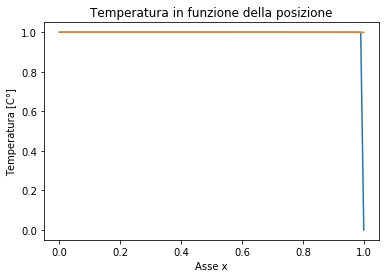

C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:69: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Loi Family\Anaconda3\lib\site-packages\ipykernel\__main__.py:70: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


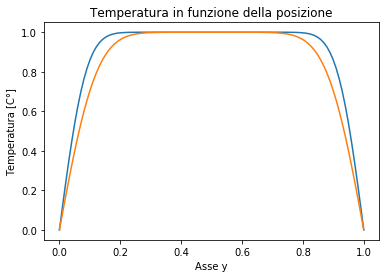

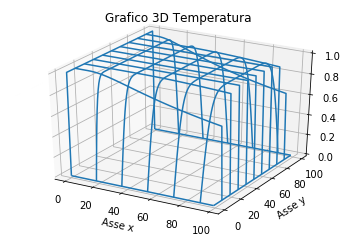

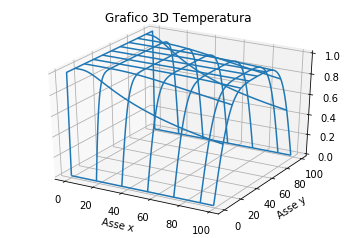

raggio spettrale GS= 1.0
Nt= 500


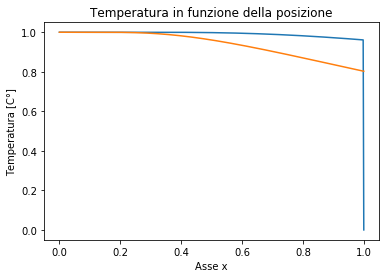

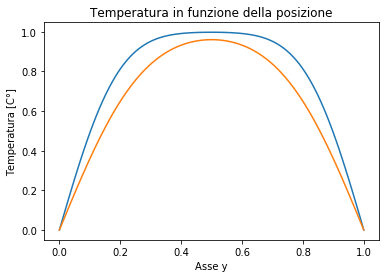

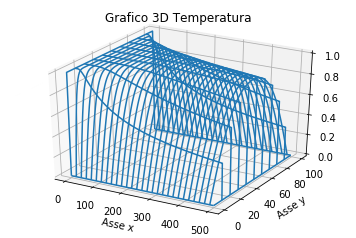

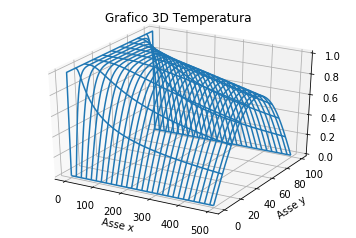

raggio spettrale GS= 1.0
Nt= 1000


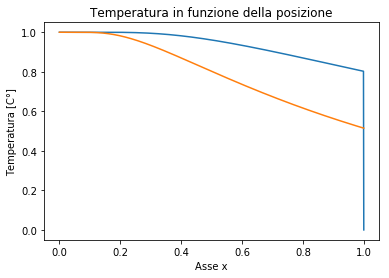

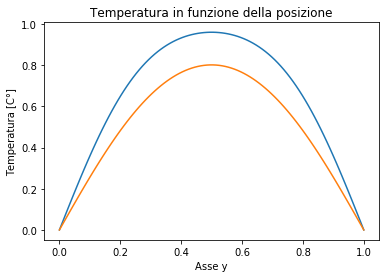

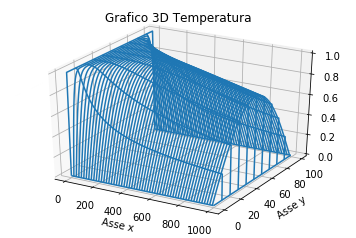

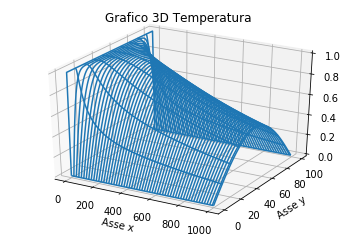

raggio spettrale GS= 1.0
Nt= 2000


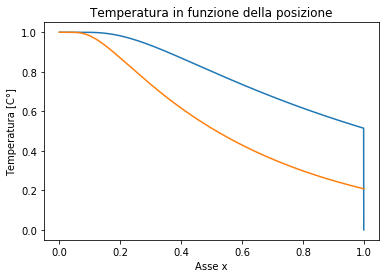

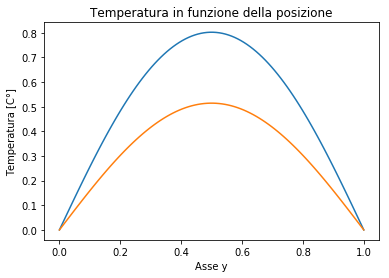

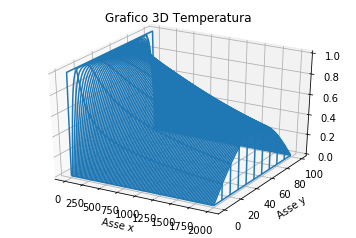

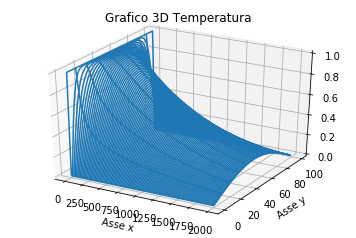

raggio spettrale GS= 1.0
Nt= 5000


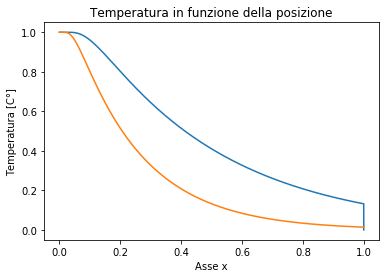

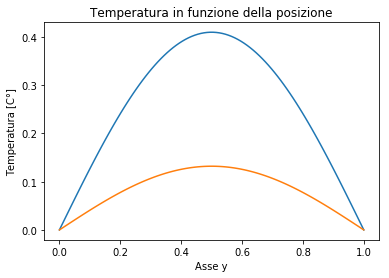

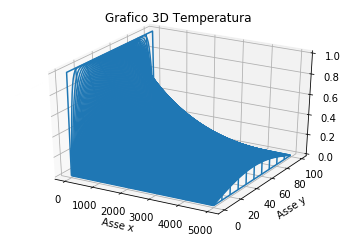

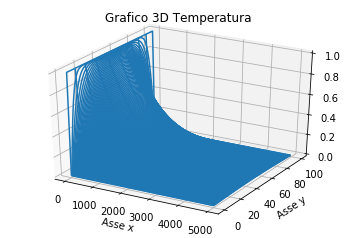

raggio spettrale GS= 1.0
Nt= 10000


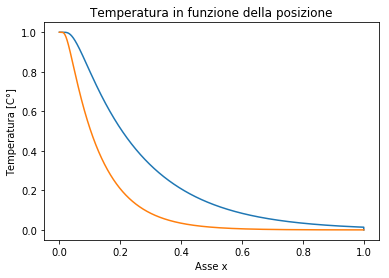

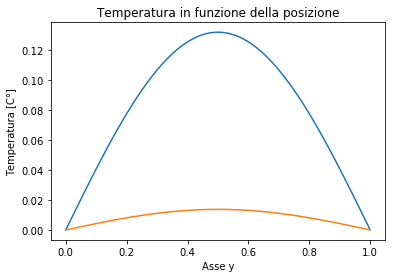

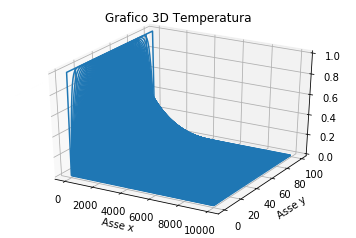

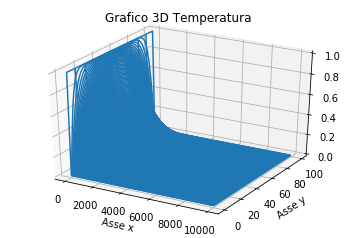

In [8]:
from numpy import *
from matplotlib.pyplot import *
from scipy import linalg 

r= [100,500,1000, 2000, 5000, 10000]  
for Nt in r:    
    N=100
    ts=1
    tau=0.9*ts
    coef=tau/ts
    T=zeros((N,Nt))
    T1=zeros((N,Nt))
    T[:,0]=1.
    T1[:,0]=1.
    
    T[0,:]=0.    #Dirichlet
    T[N-1,:]=0.
    T1[0,:]=0.    #Dirichlet
    T1[N-1,:]=0.

    for time in range (1,Nt-1):
        for i in range (1,N-1):
            T[i,time]=T[i,time-1]+0.5*coef*(T[i-1,time-1]+T[i+1,time-1]-2*T[i,time-1])
            niter=+1
    
    M=-2*eye(N)
    M[0,:]=0
    M[N-1,:]=0
    for i in range(1,N-1):
        M[i,i-1]=1
        M[i,i+1]=1

    CN=zeros((N,N))
    C=-tau/(2*ts)
    CN=C*M
    CN[0,:]=0
    CN[N-1,:]=0   
    FT=zeros((N,N))
    FT=eye(N)+CN                      ##I+C   
    
    
    FS=zeros((N,N))              ##I-C
    FS=eye(N)-CN            
    FSi=zeros((N,N))
    FSi=linalg.inv(FT)          ##(I+C)-1
    GS=zeros((N,N))
    GS=matmul(FSi,FS)
    print ('raggio spettrale GS=',max(abs(linalg.eig(GS)[0])))


##cranck MATRIX
    for time in range (0,Nt-1):
        T1[:,time+1]=matmul(GS,T1[:,time])
    print ('Nt=',Nt)
    figure(2)
    x=linspace(0,1,Nt)
    title('Temperatura in funzione della posizione')
    xlabel('Asse x')
    ylabel ('Temperatura [C°]')
    plot(x,T[N/2,:])
    plot(x,T1[N/2,:])
    show()

    figure(3)
    y=linspace(0,1,N)
    title('Temperatura in funzione della posizione')
    xlabel('Asse y')
    ylabel ('Temperatura [C°]')
    plot(y,T[:,Nt/2])
    plot(y,T1[:,Nt/2])
    show()
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(Nt),range(N))
    ax.plot_wireframe(gridx,gridy,T,cstride=18,rstride=10)
    title('Grafico 3D Temperatura')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()
    ax = gca(projection='3d')
    gridx , gridy = meshgrid(range(Nt),range(N))
    ax.plot_wireframe(gridx,gridy,T1,cstride=18,rstride=10)
    title('Grafico 3D Temperatura')
    xlabel('Asse x')
    ylabel ('Asse y')
    show()

Possiamo notare come per tempi molto piccoli i due cicli non riesco a calcolare l'evoluzione del sistema. Notiamo come il raggio spettrale rimane sempre uguale a 1 e anche per tempi diversi il metodo Cranck Nicolson è sempre più veloce e preciso nel calcolo della temperatura.